# Calling libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import re
import string
import spacy
import time
import warnings
import seaborn as sns
from spacy import displacy
Text_Visualization = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob
%pip install emoji
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from yellowbrick.cluster import KElbowVisualizer
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [16, 10]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read & Data analysis 

In [ ]:
#Read data        
data = pd.read_csv("/content/drive/MyDrive/tweets.csv",encoding='ISO-8859-1',header=None)
data=data.sample(10000)


data.head()

,0,1,2,3,4,5
287542,0,1994249685,Mon Jun 01 11:38:46 PDT 2009,NO_QUERY,RosalieCullen,Once again I'm sitting by myself outside in the court yard at school
1378226,4,2051982212,Fri Jun 05 23:19:14 PDT 2009,NO_QUERY,alynnolivia,can totally finally afford a dining room table!!! perhaps this may be accomplished on my sunday off
597149,0,2219198445,Thu Jun 18 00:00:37 PDT 2009,NO_QUERY,skimmylou,My phone is being ridiculous.
628147,0,2231192822,Thu Jun 18 18:10:15 PDT 2009,NO_QUERY,shabooka,jus startted here dnt no wat to do!!
114337,0,1826242895,Sun May 17 08:02:23 PDT 2009,NO_QUERY,KyleSadler,first Sunday at Lighthouse! no one around here has twitter that i know of atleast


In [ ]:
#create a name for each column to modify them easy
data.columns= ['Target', 'ID', 'Date', 'NO_QUERY', 'Auther', 'Post']

data.head()

,Target,ID,Date,NO_QUERY,Auther,Post
287542,0,1994249685,Mon Jun 01 11:38:46 PDT 2009,NO_QUERY,RosalieCullen,Once again I'm sitting by myself outside in the court yard at school
1378226,4,2051982212,Fri Jun 05 23:19:14 PDT 2009,NO_QUERY,alynnolivia,can totally finally afford a dining room table!!! perhaps this may be accomplished on my sunday off
597149,0,2219198445,Thu Jun 18 00:00:37 PDT 2009,NO_QUERY,skimmylou,My phone is being ridiculous.
628147,0,2231192822,Thu Jun 18 18:10:15 PDT 2009,NO_QUERY,shabooka,jus startted here dnt no wat to do!!
114337,0,1826242895,Sun May 17 08:02:23 PDT 2009,NO_QUERY,KyleSadler,first Sunday at Lighthouse! no one around here has twitter that i know of atleast


In [ ]:
#data information
print(data.shape)
print("....................................")
print(data.describe())
print("....................................")
data.info()
print("....................................")
print(data.dtypes)

(10000, 6)
....................................
           Target            ID
count  10000.0000  1.000000e+04
mean       2.0012  1.998540e+09
std        2.0001  1.912809e+08
min        0.0000  1.467825e+09
25%        0.0000  1.957097e+09
50%        4.0000  2.001331e+09
75%        4.0000  2.176645e+09
max        4.0000  2.329175e+09
....................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 287542 to 262795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    10000 non-null  int64 
 1   ID        10000 non-null  int64 
 2   Date      10000 non-null  object
 3   NO_QUERY  10000 non-null  object
 4   Auther    10000 non-null  object
 5   Post      10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB
....................................
Target       int64
ID           int64
Date        object
NO_QUERY    object
Auther      object
Post        object
dtype:

In [ ]:
#no. of Target values
data["Target"].value_counts()

4    5003
0    4997
Name: Target, dtype: int64

# Cleaning Data 

<font color='red'><font size = 5 >Start Cleaning our data</font>

<font color='blue'><font size = 2 >     1. Lowercasing all the letters</font>

In [ ]:
data['results'] = data['Post'].str.lower()
display(data)

,Target,ID,Date,NO_QUERY,Auther,Post,results
287542,0,1994249685,Mon Jun 01 11:38:46 PDT 2009,NO_QUERY,RosalieCullen,Once again I'm sitting by myself outside in the court yard at school,once again i'm sitting by myself outside in the court yard at school
1378226,4,2051982212,Fri Jun 05 23:19:14 PDT 2009,NO_QUERY,alynnolivia,can totally finally afford a dining room table!!! perhaps this may be accomplished on my sunday off,can totally finally afford a dining room table!!! perhaps this may be accomplished on my sunday off
597149,0,2219198445,Thu Jun 18 00:00:37 PDT 2009,NO_QUERY,skimmylou,My phone is being ridiculous.,my phone is being ridiculous.
628147,0,2231192822,Thu Jun 18 18:10:15 PDT 2009,NO_QUERY,shabooka,jus startted here dnt no wat to do!!,jus startted here dnt no wat to do!!
114337,0,1826242895,Sun May 17 08:02:23 PDT 2009,NO_QUERY,KyleSadler,first Sunday at Lighthouse! no one around here has twitter that i know of atleast,first sunday at lighthouse! no one around here has twitter that i know of atleast
...,...,...,...,...,...,...,...
957071,4,1825371036,Sun May 17 05:27:05 PDT 2009,NO_QUERY,burntbroccoli,@wantit talking to yourself again eh?,@wantit talking to yourself again eh?
970199,4,1828014361,Sun May 17 11:54:55 PDT 2009,NO_QUERY,MzGemini87,Omg good afternoon all I can't believe i missed church again lord plz forgive me forgive for missing the word on today lol,omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol
1471597,4,2065234772,Sun Jun 07 08:10:36 PDT 2009,NO_QUERY,sherryinbc,"@carinafox5 HAHA! I JUST picked up my @idolscott tickets from Tmaster, yup, bought them a month ago and never went to get them","@carinafox5 haha! i just picked up my @idolscott tickets from tmaster, yup, bought them a month ago and never went to get them"
1194741,4,1984500151,Sun May 31 15:13:42 PDT 2009,NO_QUERY,gaabs_,"@tommcfly haha, owwn Tom! was beautiful in FaustÃ£o today!","@tommcfly haha, owwn tom! was beautiful in faustã£o today!"


<font color='blue'><font size = 2 >2.Removing Consecutive letters</font>
 

In [ ]:
#Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
#cause some words like "all" if we replaced "ll" with only one "l" will lose the meaning
#str = "heyyyyyy"
#print(re.sub(r"(.)\1\1+", r"\1\1", str))
#output will be : heyy

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1\1+', r'\1\1', text)
data['results'] = data['results'].apply(lambda x: cleaning_repeating_char(x))
data['results'].tail()


957071                                                                                              @wantit talking to yourself again eh? 
970199         omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597    @carinafox5 haha! i just picked up my @idolscott tickets from tmaster, yup, bought them a month ago and never went to get them 
1194741                                                                        @tommcfly haha, owwn tom! was beautiful in faustã£o today! 
262795                                                                                      @judd40 final on sunday? wtf?  also poor subo 
Name: results, dtype: object

<font color='blue'><font size = 2 >3.Replace all emojis </font>


In [ ]:
#ex: The emoji 💣 or the shortcode :bomb: will be converted to "bomba" its meaning in English by demojize()
data['results'] = data['results'].apply(lambda x: emoji.demojize(x,language='es'))
data['results'].tail()


957071                                                                                              @wantit talking to yourself again eh? 
970199         omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597    @carinafox5 haha! i just picked up my @idolscott tickets from tmaster, yup, bought them a month ago and never went to get them 
1194741                                                                        @tommcfly haha, owwn tom! was beautiful in faustã£o today! 
262795                                                                                      @judd40 final on sunday? wtf?  also poor subo 
Name: results, dtype: object

<font color='blue'><font size = 2 >4. Remove Hashtags</font>

In [ ]:
def cleaning_hashtag(hash):
    hash_pattern = re.compile(r'#[A-Za-z0-9_]+')
    return hash_pattern.sub(r'', hash) 
data['results'] = data['results'].apply(lambda x: cleaning_hashtag(x))
data['results'].tail()

957071                                                                                              @wantit talking to yourself again eh? 
970199         omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597    @carinafox5 haha! i just picked up my @idolscott tickets from tmaster, yup, bought them a month ago and never went to get them 
1194741                                                                        @tommcfly haha, owwn tom! was beautiful in faustã£o today! 
262795                                                                                      @judd40 final on sunday? wtf?  also poor subo 
Name: results, dtype: object

<font color='blue'><font size = 2 >5. Remove @ or mentions</font>

In [ ]:
def cleaning_ment(ment):
    ment_pattern = re.compile(r'@[A-Za-z0-9_]+')
    return ment_pattern.sub(r'', ment) 
data['results'] = data['results'].apply(lambda x: cleaning_ment(x))
data['results'].tail()

957071                                                                                                  talking to yourself again eh? 
970199     omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597                      haha! i just picked up my  tickets from tmaster, yup, bought them a month ago and never went to get them 
1194741                                                                              haha, owwn tom! was beautiful in faustã£o today! 
262795                                                                                          final on sunday? wtf?  also poor subo 
Name: results, dtype: object

<font color='blue'><font size = 2 >6. Remove links</font>

In [ ]:
def cleaning_lnk(lnk):
    lnk_pattern = re.compile(r'http\S+|www.\S+|<.*?>')
    return lnk_pattern.sub(r'', lnk) 
data['results'] = data['results'].apply(lambda x: cleaning_lnk(x))
data['results'].tail()

957071                                                                                                  talking to yourself again eh? 
970199     omg good afternoon all i can't believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597                      haha! i just picked up my  tickets from tmaster, yup, bought them a month ago and never went to get them 
1194741                                                                              haha, owwn tom! was beautiful in faustã£o today! 
262795                                                                                          final on sunday? wtf?  also poor subo 
Name: results, dtype: object

# Visualization

<font color='blue'><font size = 2 >Visualizing the dependency</font>

In [ ]:
doc_dep = data["results"][:5].apply(lambda x: Text_Visualization(x))
option_dep ={'distance': 100, "color": "#30c8b6", "bg": "#193380", "font": "Arial"}
displacy.render(doc_dep, style='dep', jupyter=True, options=option_dep)

<font color='blue'><font size = 2 >Visualizing the entity recognizer</font>

In [ ]:
doc_ent = data["results"][:10].apply(lambda x: Text_Visualization(x))
#doc_ent.user_data["title"] = "ENT"
displacy.render(doc_ent, style='ent', jupyter=True)

<font color='blue'><font size = 2 >7. Remove puctuations and non-alphanumeric</font>

In [ ]:
#remove (anything not alphanumeric,whitespace or digit)
def cleaning_punc(punc):
    for char in string.punctuation:
        punc = punc.replace(char, '')
    return punc
data['results'] = data['results'].apply(cleaning_punc)
data['results'].tail()

957071                                                                                                  talking to yourself again eh 
970199     omg good afternoon all i cant believe i missed church again lord plz forgive me forgive for missing the word on today lol 
1471597                        haha i just picked up my  tickets from tmaster yup bought them a month ago and never went to get them 
1194741                                                                                haha owwn tom was beautiful in faustã£o today 
262795                                                                                           final on sunday wtf  also poor subo 
Name: results, dtype: object

<font color='blue'><font size = 2 >8.Tokenization </font>

In [ ]:
#Tokenization
data['results'] = data['results'].apply(lambda x: word_tokenize(x))
data['results'].tail()

957071                                                                                                                    [talking, to, yourself, again, eh]
970199     [omg, good, afternoon, all, i, cant, believe, i, missed, church, again, lord, plz, forgive, me, forgive, for, missing, the, word, on, today, lol]
1471597                           [haha, i, just, picked, up, my, tickets, from, tmaster, yup, bought, them, a, month, ago, and, never, went, to, get, them]
1194741                                                                                               [haha, owwn, tom, was, beautiful, in, faustã£o, today]
262795                                                                                                            [final, on, sunday, wtf, also, poor, subo]
Name: results, dtype: object

<font color='blue'><font size = 2 >9.Remove Stop Words </font>

In [ ]:
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [ ]:
# add new column 'results' to asign 'post' column without stop words
data['results']= data['results'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
tokenword = data['Post'].apply(lambda x: word_tokenize(x))
res = data['results']

In [ ]:
print('Tokenized words:\n ',tokenword) 
print("....................................")
print('\nNo-Stopwords:\n ',res)
print("....................................")
data

Tokenized words:
  287542                                                                                 [Once, again, I, 'm, sitting, by, myself, outside, in, the, court, yard, at, school]
1378226                                         [can, totally, finally, afford, a, dining, room, table, !, !, !, perhaps, this, may, be, accomplished, on, my, sunday, off]
597149                                                                                                                                [My, phone, is, being, ridiculous, .]
628147                                                                                                                    [jus, startted, here, dnt, no, wat, to, do, !, !]
114337                                                                  [first, Sunday, at, Lighthouse, !, no, one, around, here, has, twitter, that, i, know, of, atleast]
                                                                                         ...                             

,Target,ID,Date,NO_QUERY,Auther,Post,results
287542,0,1994249685,Mon Jun 01 11:38:46 PDT 2009,NO_QUERY,RosalieCullen,Once again I'm sitting by myself outside in the court yard at school,"[im, sitting, outside, court, yard, school]"
1378226,4,2051982212,Fri Jun 05 23:19:14 PDT 2009,NO_QUERY,alynnolivia,can totally finally afford a dining room table!!! perhaps this may be accomplished on my sunday off,"[totally, finally, afford, dining, room, table, accomplished, sunday]"
597149,0,2219198445,Thu Jun 18 00:00:37 PDT 2009,NO_QUERY,skimmylou,My phone is being ridiculous.,"[phone, ridiculous]"
628147,0,2231192822,Thu Jun 18 18:10:15 PDT 2009,NO_QUERY,shabooka,jus startted here dnt no wat to do!!,"[jus, startted, dnt, wat]"
114337,0,1826242895,Sun May 17 08:02:23 PDT 2009,NO_QUERY,KyleSadler,first Sunday at Lighthouse! no one around here has twitter that i know of atleast,"[sunday, lighthouse, twitter, know, atleast]"
...,...,...,...,...,...,...,...
957071,4,1825371036,Sun May 17 05:27:05 PDT 2009,NO_QUERY,burntbroccoli,@wantit talking to yourself again eh?,"[talking, eh]"
970199,4,1828014361,Sun May 17 11:54:55 PDT 2009,NO_QUERY,MzGemini87,Omg good afternoon all I can't believe i missed church again lord plz forgive me forgive for missing the word on today lol,"[omg, good, afternoon, believe, missed, church, lord, plz, forgive, forgive, missing, word, today, lol]"
1471597,4,2065234772,Sun Jun 07 08:10:36 PDT 2009,NO_QUERY,sherryinbc,"@carinafox5 HAHA! I JUST picked up my @idolscott tickets from Tmaster, yup, bought them a month ago and never went to get them","[haha, just, picked, tickets, tmaster, yup, bought, month, ago, went]"
1194741,4,1984500151,Sun May 31 15:13:42 PDT 2009,NO_QUERY,gaabs_,"@tommcfly haha, owwn Tom! was beautiful in FaustÃ£o today!","[haha, owwn, tom, beautiful, faustã£o, today]"


In [ ]:
# data['Post'] = data['Post'].apply(lambda x: ' '.join(x))
data['results'] = data['results'].apply(lambda x: ' '.join(x))

In [ ]:
type(data.results.values)

numpy.ndarray

In [ ]:
type(data.Post)

pandas.core.series.Series

In [ ]:
df = data[data['results'].notnull()]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['results'] = le.fit_transform(df.results.values)

t-Distributed Stochastic Neighbor Embedding 

In [ ]:
# tsne code from this great kernel: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# New_df is from the random undersample data (fewer instances)
import time
from sklearn.manifold import TSNE
X = df['results']
y = df['Target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 9.7e+01 s


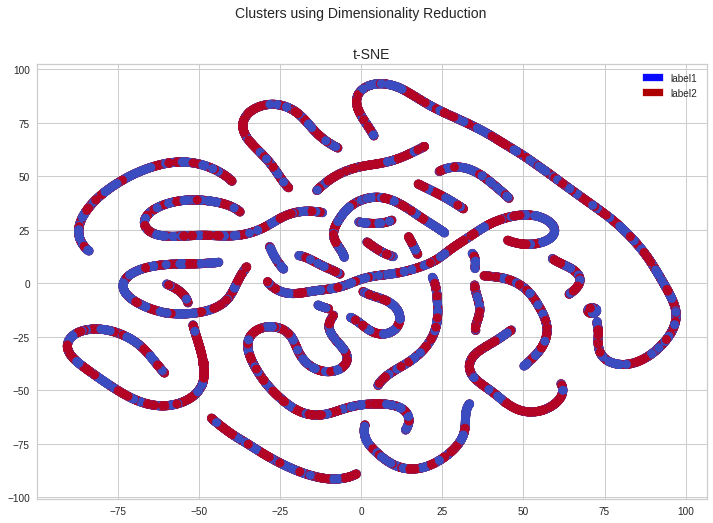

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
# labels = ['Label1', 'Label2']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='label1')
red_patch = mpatches.Patch(color='#AF0000', label='label2')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='label1', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 4), cmap='coolwarm', label='label2', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


plt.show()

In [ ]:
reindexed_data = data['Post'] #.str.decode("utf-8", errors="ignore")

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

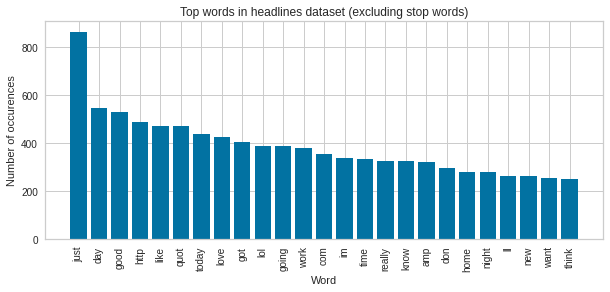

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Using NLP Tools 

# TFIDF

In [ ]:
vec = TfidfVectorizer(stop_words="english")

vec.fit(data.Post.values)
features = vec.transform(data.results.values)

In [ ]:
features.shape

(10000, 18326)

# clustering

### MiniBatchKMeans:

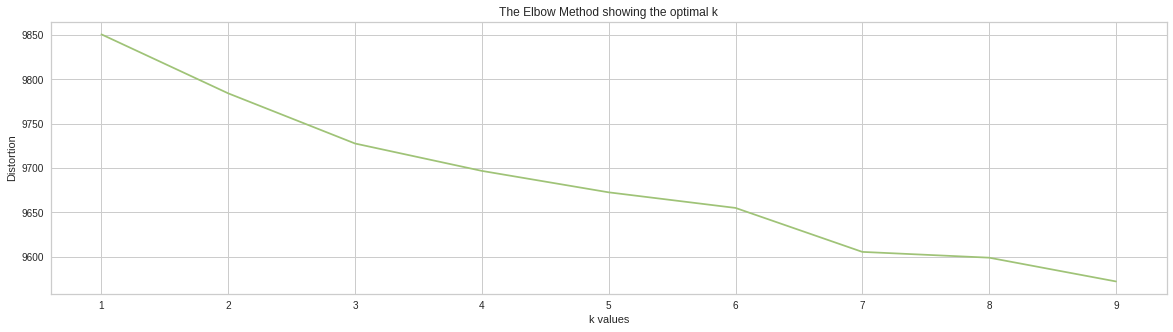

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k,random_state=7)
    kmean.fit(features)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, distortions, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
cls = MiniBatchKMeans(3,random_state=1000, max_iter= 200)
cls.fit(features)

MiniBatchKMeans(max_iter=200, n_clusters=3, random_state=1000)

In [ ]:
y_predict = cls.predict(features)

In [ ]:
cls.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.83449956e-05, 3.53474545e-05, 0.00000000e+00, ...,
        6.11652173e-05, 5.28361113e-05, 9.51508306e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
len(cls.cluster_centers_) , len(cls.cluster_centers_[0])

(3, 18326)

# PCA

In [ ]:
pca = PCA(n_components=2)
PCA = pca.fit(features.toarray())
X_pca = pca.transform(features.toarray())

In [ ]:
X_pca

array([[ 0.23321179, -0.05796219],
       [-0.02826515, -0.00827138],
       [-0.03458068, -0.00792352],
       ...,
       [-0.02903949, -0.00639675],
       [-0.03041991, -0.00503079],
       [-0.03187537, -0.00546108]])

In [ ]:
len(X_pca) , len(X_pca[0]) 


(10000, 2)

In [ ]:
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
reduced_cluster_centers

array([[-0.0285578 , -0.00933659],
       [ 0.00023312, -0.00037278],
       [-0.03169811, -0.01001273]])

# KMEANS

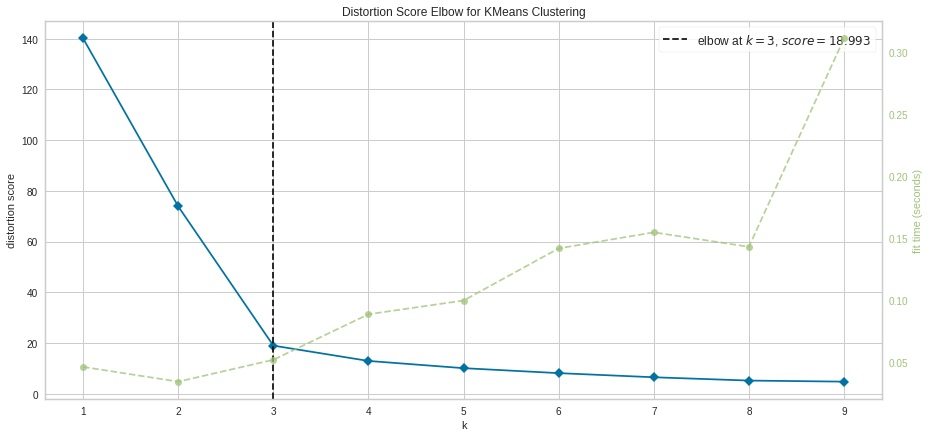

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10),size=(1080, 500))

visualizer.fit(X_pca)        
visualizer.show() 

In [ ]:
kmeanModel = KMeans(n_clusters=3,random_state=1000)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_;
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

,x,y
0,-0.029096,-0.006733


In [ ]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(1)

,x,y,label
0,0.233212,-0.057962,2


Text(0.5, 1.0, 'scatter plot')

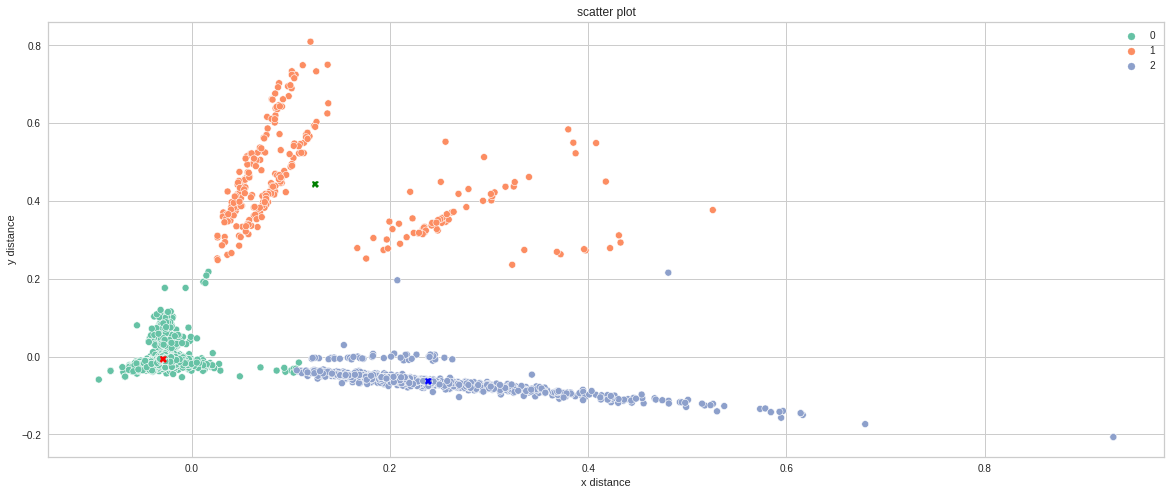

In [ ]:
plt.figure(figsize=(20,8))

sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=pred_labels.tolist(),palette='Set2')
colors = ['red', 'green', 'blue', 'yellow']

for i,color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X', label='K-means center: %d' % i, color=colors[i])
plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')

# Evaluation

In [ ]:
order_centroids = cls.cluster_centers_.argsort()[:, ::-1]
order_centroids




array([[10441,   903,  9858, ..., 12207, 12206,     0],
       [ 7889,  8746,  6715, ...,  5076, 11043,  9162],
       [12481,  1638,  6111, ..., 12208, 12207,     0]])

In [ ]:
terms = vec.get_feature_names()
#terms


In [ ]:
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print('------------------------------------------')


Cluster 0:
 mexico
 airport
 luck
 way
 wish
 think
 follower
 followers
 followed
 follow
 folllow
 folding
 followes
 folliwin
 folks
 folklore
 folklaura
 folk
 foldinglaundry
 folders
------------------------------------------
Cluster 1:
 im
 just
 good
 dont
 day
 love
 like
 work
 got
 going
 today
 na
 lol
 know
 really
 time
 thats
 thanks
 miss
 home
------------------------------------------
Cluster 2:
 pobrecito
 aww
 follow
 folk
 folklaura
 folklore
 folks
 folliwin
 folllow
 ð¾ñ
 folding
 followed
 follower
 followers
 followes
 followfriday
 followin
 foldinglaundry
 folders
 follows
------------------------------------------


In [ ]:

Y = vec.transform(["mexico airport are explosed "])
prediction = cls.predict(Y)
print(prediction)



[0]


In [ ]:
Y = vec.transform(["i got to go work. "])
prediction = cls.predict(Y)
print(prediction)


[1]


In [ ]:

Y = vec.transform(["we say in spanish you are pobrecito"])
prediction = cls.predict(Y)
print(prediction)


[2]
